# Real Demo With MET Dataset

Smaller version (3GB) containing a subset of the ./MET folder, 38307 images in total

https://www.kaggle.com/datasets/dschettler8845/the-met-dataset?select=small_MET

In [1]:
%load_ext autoreload
%autoreload 2
from dimension_reduction import *

In [2]:
root_folder = 'data/MET'

# takes about 2m to run this
images_array = load_images_from_folders(root_folder)
print(images_array.shape)  #(num_images, height, width, channels)

(38307, 128, 128, 3)


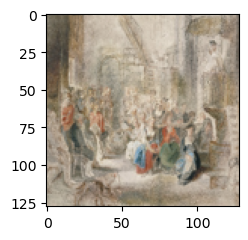

In [3]:
example_image = images_array[20]
plt.figure(figsize=(2.5, 2.5))
plt.imshow(example_image.reshape((128, 128, 3)))
plt.show()

In [4]:
images_array_grey = load_images_from_folders(root_folder, mode='L')
print(images_array_grey.shape)

(38307, 128, 128)


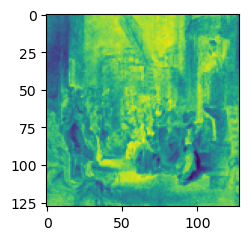

In [5]:
example_image_grey = images_array_grey[20]
plt.figure(figsize=(2.5, 2.5))
plt.imshow(example_image_grey.reshape((128, 128)))
plt.show()

In [6]:
flattened_grey = np.array([image.flatten() for image in images_array_grey])
flattened_color = np.array([image.flatten() for image in images_array])

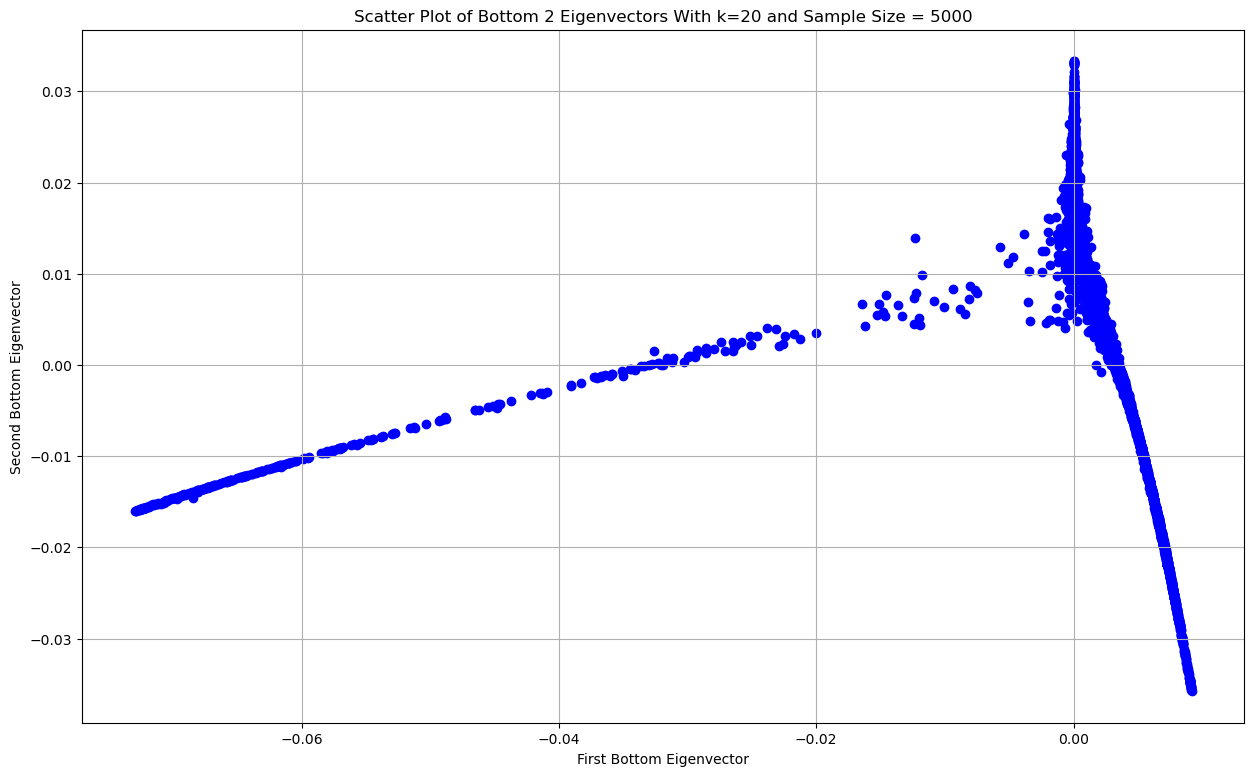

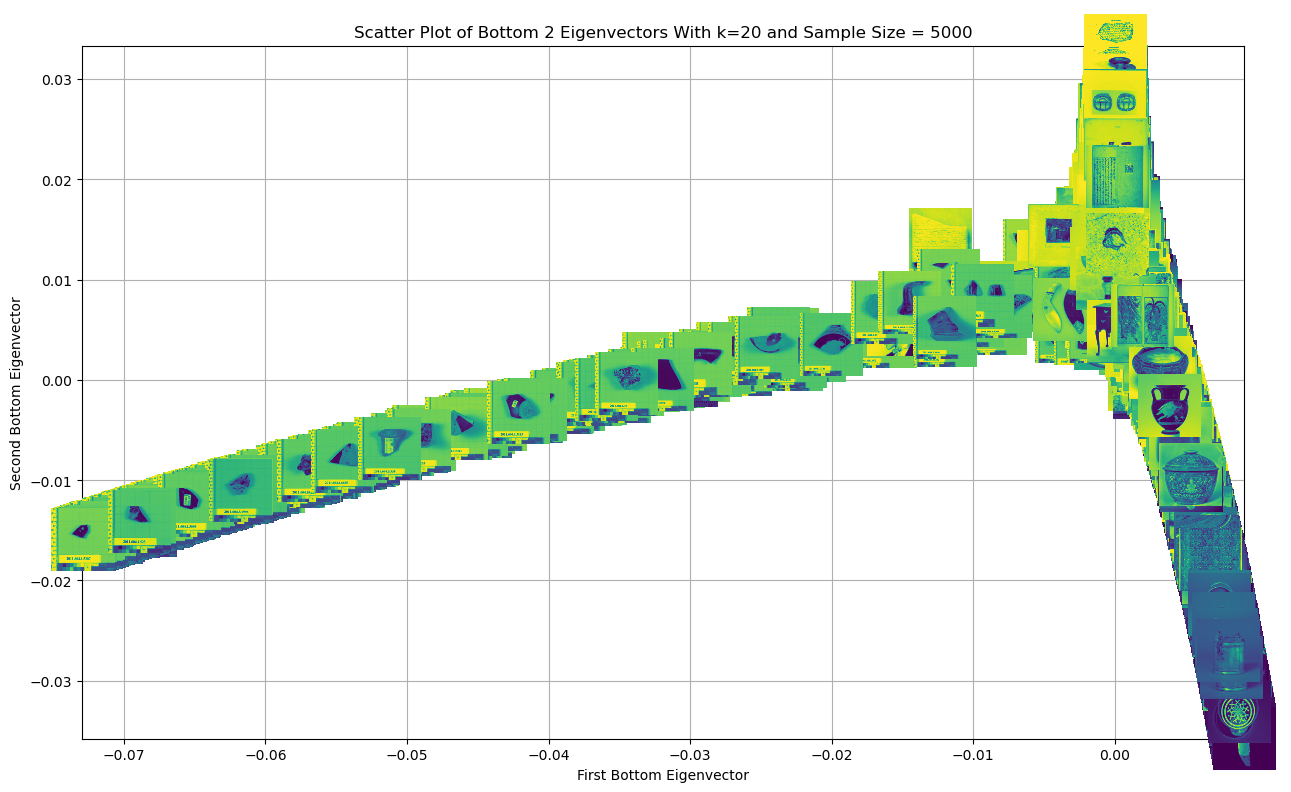

In [11]:
laplacian_eigenmap(flattened_grey[:5000], radial_func='knn', k=20, image_dim=128)

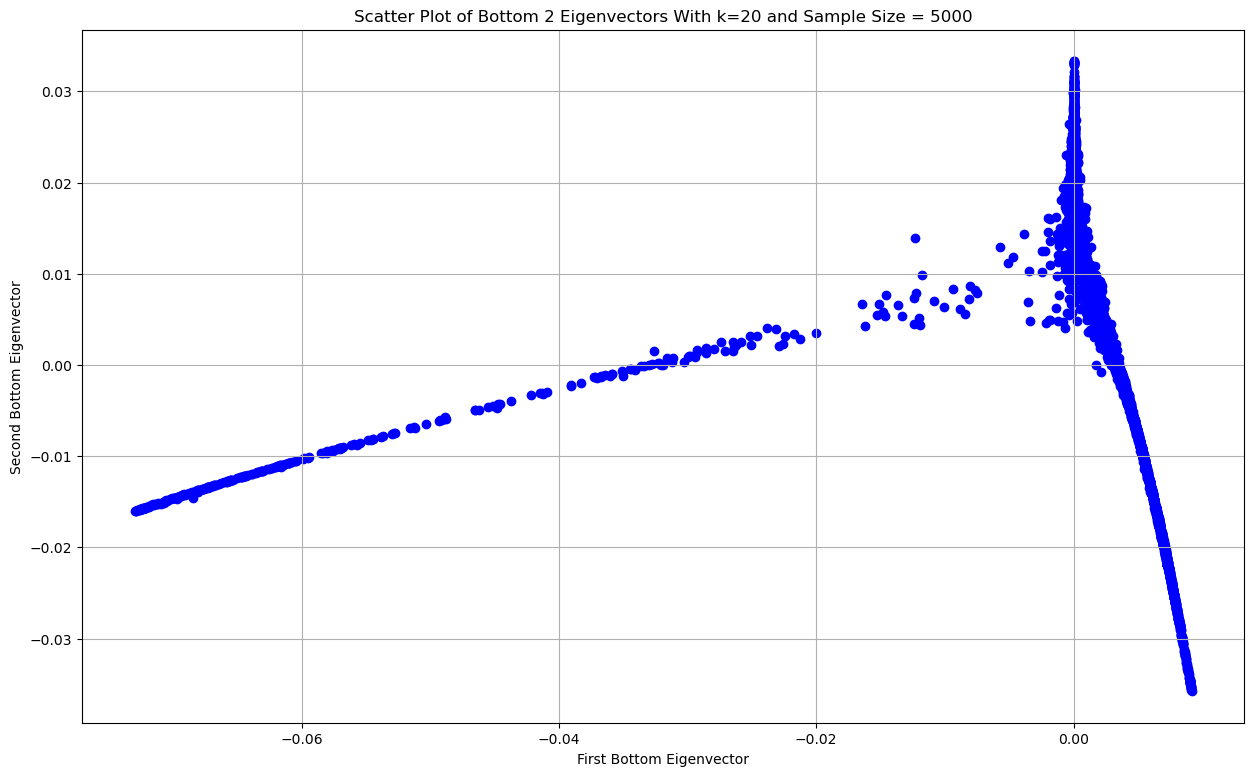

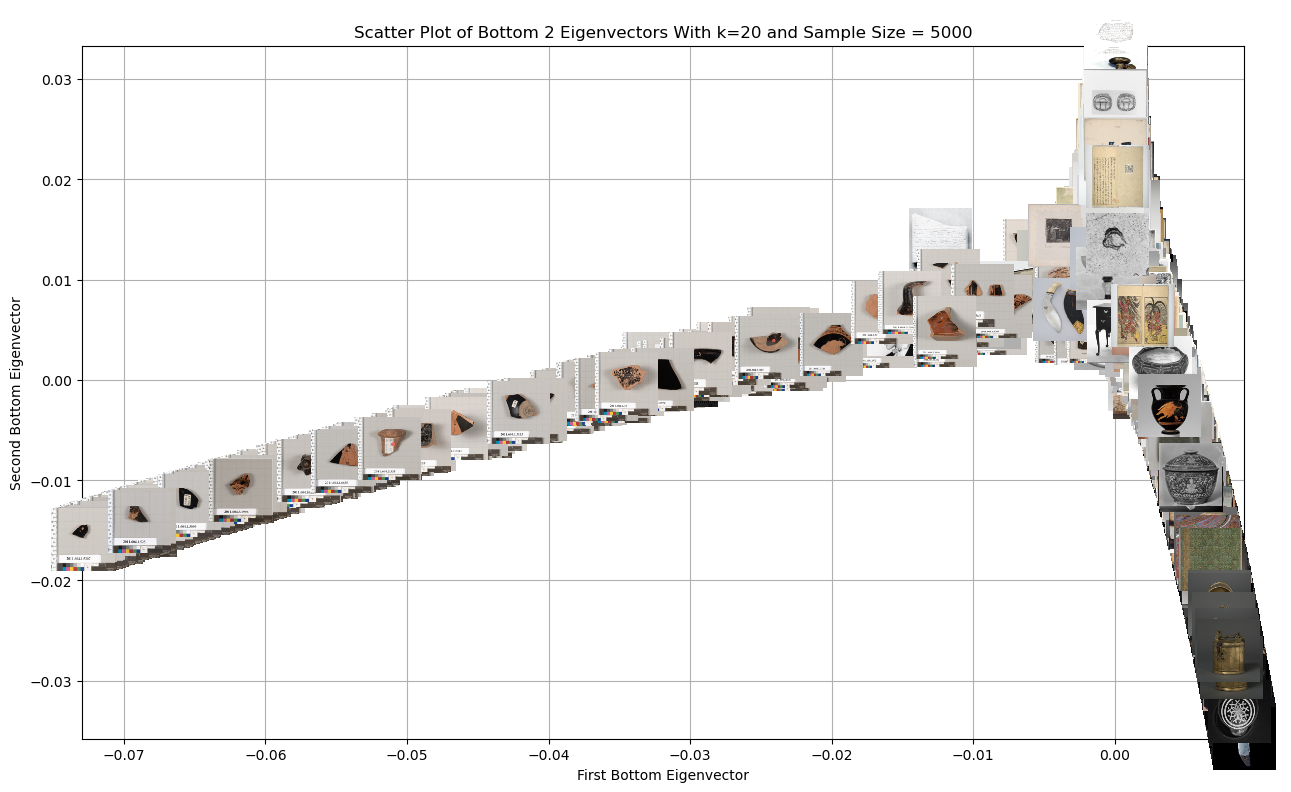

In [12]:
laplacian_eigenmap(flattened_grey[:5000], radial_func='knn', k=20, image_dim=128, color_image=True, color_data=flattened_color)

<module 'matplotlib.pyplot' from '/Users/kevinb/miniforge3/envs/dsc80/lib/python3.8/site-packages/matplotlib/pyplot.py'>

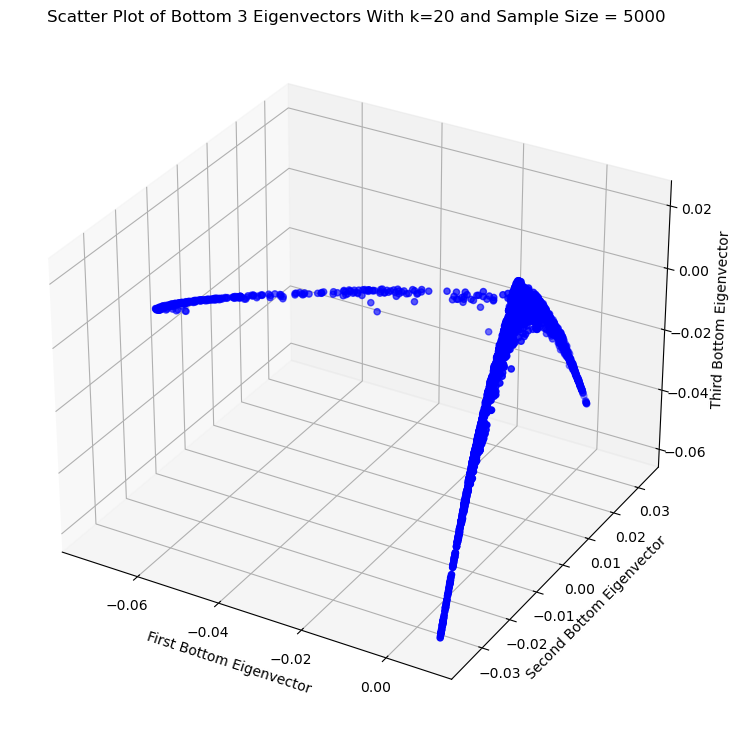

In [13]:
laplacian_eigenmap_3d(flattened_grey[:5000], 20)

# Performance Measures

Measuring performance: 100%|██████████| 5/5 [00:58<00:00, 11.69s/sizes]


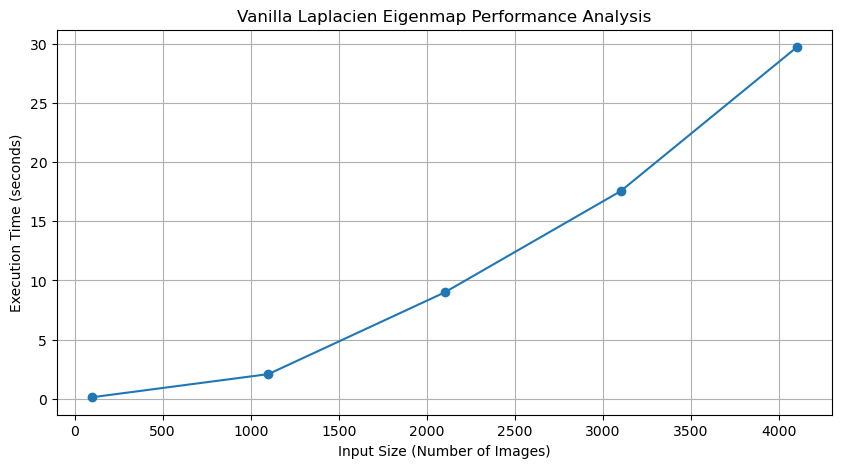

In [10]:
import time
from tqdm import tqdm

def sample_function(n):
    return sum(range(n))

# Measure the performance
input_sizes = range(100, 5000, 1000)
execution_times = []

for size in tqdm(input_sizes, desc="Measuring performance", unit="sizes"):
    start_time = time.time()  # Start time
    laplacian_eigenmap_bench_mark(flattened_grey[:size], 50, image_dim=128)
    end_time = time.time()  # End time
    execution_time = end_time - start_time  # Calculate execution time
    execution_times.append(execution_time)  # Append to the list

# Plotting the performance
plt.figure(figsize=(10, 5))
plt.plot(input_sizes, execution_times, marker='o')
plt.title('Vanilla Laplacien Eigenmap Performance Analysis')
plt.xlabel('Input Size (Number of Images)')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()